In [1]:
%cd /home/ubuntu/Qwen-Image-Edit-Angles

/home/ubuntu/Qwen-Image-Edit-Angles


In [2]:
from qwenimage.experiment import ExperimentConfig



In [3]:

csv_path = report_dir = ExperimentConfig().report_dir / f"transformer_activations.csv"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV data
df = pd.read_csv(csv_path)

# Extract index_block from name column
def extract_index_block(name):
    return int(name.split(".")[1])
    

df['index_block'] = df['name'].apply(extract_index_block)

df.head()

,Unnamed: 0,name,mean,max,index_block
0,0,encoder_hidden_states.0,64376.0,35435520.0,0
1,1,hidden_states.0,359924.0,83005440.0,0
2,2,encoder_hidden_states.1,91138.0,43037696.0,1
3,3,hidden_states.1,409388.0,87512064.0,1
4,4,encoder_hidden_states.2,101764.0,52546048.0,2


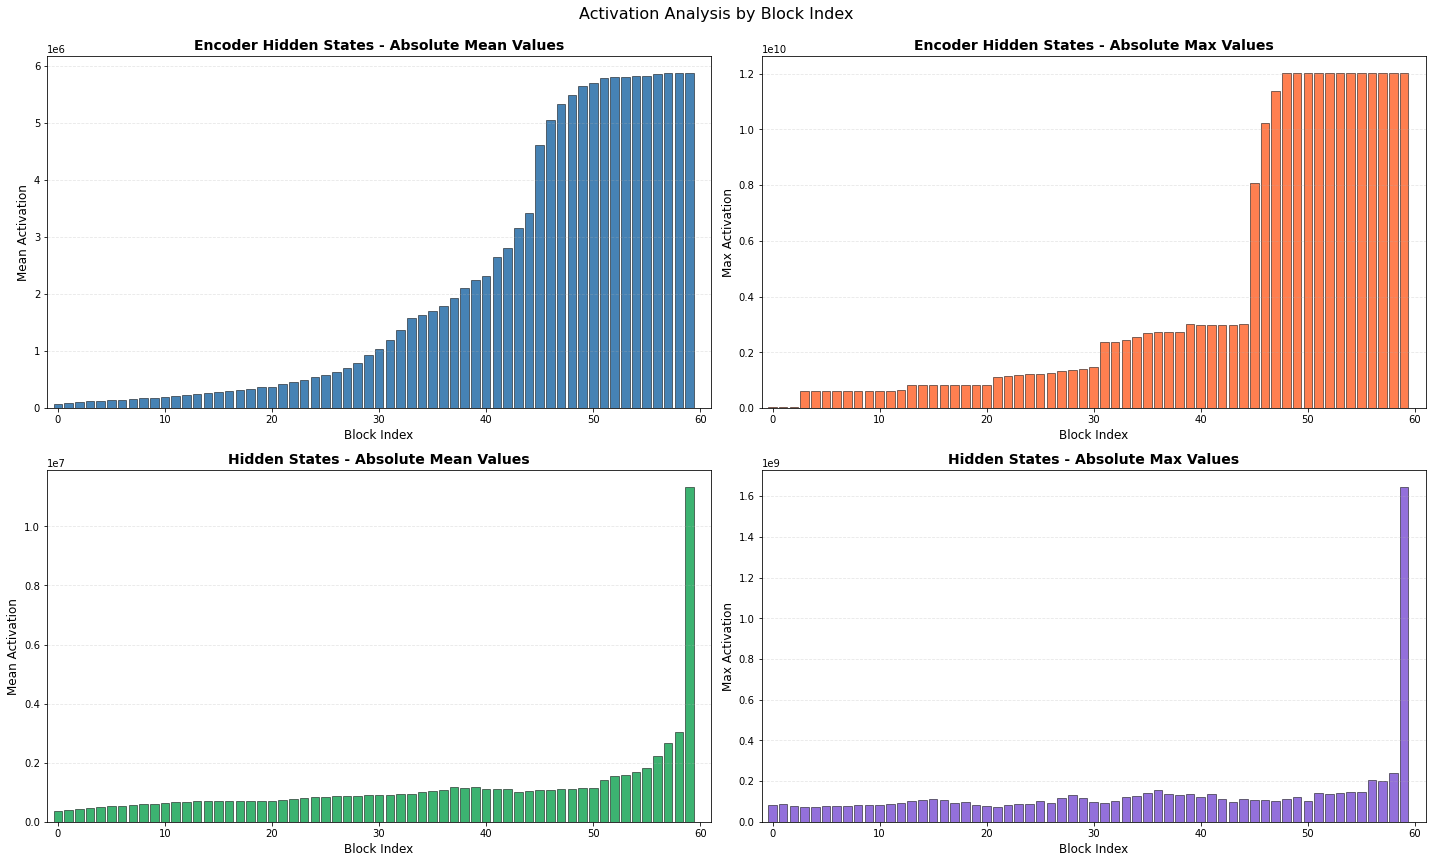


Encoder Hidden States:
  Blocks found: 60
  Mean range: [64376.0000, 5879424.0000]
  Max range: [35435520.0000, 12019564544.0000]

Hidden States:
  Blocks found: 60
  Mean range: [359924.0000, 11344896.0000]
  Max range: [72206848.0000, 1646379008.0000]


In [7]:
# Create four bar plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Activation Analysis by Block Index', fontsize=16, y=0.995)

# Filter data for encoder_hidden_states
encoder_df = df[df['name'].str.startswith('encoder_hidden_states')].copy()
encoder_df = encoder_df.dropna(subset=['index_block'])
encoder_df = encoder_df.sort_values('index_block')

# Filter data for hidden_states (but not encoder_hidden_states)
hidden_df = df[df['name'].str.startswith('hidden_states') & 
               ~df['name'].str.startswith('encoder_hidden_states')].copy()
hidden_df = hidden_df.dropna(subset=['index_block'])
hidden_df = hidden_df.sort_values('index_block')

# Plot 1: encoder_hidden_states - mean values
axes[0, 0].bar(encoder_df['index_block'], encoder_df['mean'], color='steelblue', edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Encoder Hidden States - Absolute Mean Values', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Block Index', fontsize=12)
axes[0, 0].set_ylabel('Mean Activation', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_xlim(-1, 61)

# Plot 2: encoder_hidden_states - max values
axes[0, 1].bar(encoder_df['index_block'], encoder_df['max'], color='coral', edgecolor='black', linewidth=0.5)
axes[0, 1].set_title('Encoder Hidden States - Absolute Max Values', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Block Index', fontsize=12)
axes[0, 1].set_ylabel('Max Activation', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].set_xlim(-1, 61)

# Plot 3: hidden_states - mean values
axes[1, 0].bar(hidden_df['index_block'], hidden_df['mean'], color='mediumseagreen', edgecolor='black', linewidth=0.5)
axes[1, 0].set_title('Hidden States - Absolute Mean Values', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Block Index', fontsize=12)
axes[1, 0].set_ylabel('Mean Activation', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].set_xlim(-1, 61)

# Plot 4: hidden_states - max values
axes[1, 1].bar(hidden_df['index_block'], hidden_df['max'], color='mediumpurple', edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Hidden States - Absolute Max Values', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Block Index', fontsize=12)
axes[1, 1].set_ylabel('Max Activation', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].set_xlim(-1, 61)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nEncoder Hidden States:")
print(f"  Blocks found: {len(encoder_df)}")
print(f"  Mean range: [{encoder_df['mean'].min():.4f}, {encoder_df['mean'].max():.4f}]")
print(f"  Max range: [{encoder_df['max'].min():.4f}, {encoder_df['max'].max():.4f}]")

print(f"\nHidden States:")
print(f"  Blocks found: {len(hidden_df)}")
print(f"  Mean range: [{hidden_df['mean'].min():.4f}, {hidden_df['mean'].max():.4f}]")
print(f"  Max range: [{hidden_df['max'].min():.4f}, {hidden_df['max'].max():.4f}]")
